In [300]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad

In [301]:
import os
import pandas as pd
import re
import numpy as np
import glob
from pathlib import Path
from scipy import sparse
from copy import deepcopy
import pickle

In [302]:
adata_og = sc.read('HTAN_SCLC_Myeloid.h5ad')

In [303]:
adata = ad.AnnData(X = adata_og.raw.X, obs = adata_og.obs, var = adata_og.raw.var)

In [304]:
adata

AnnData object with n_obs × n_vars = 2951 × 22447
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'author_cell_type', 'cell_type_cluster', 'clusters', 'PLCG2+ Tumor Subclone', 'Mo/Mφ_metacluster', 'IPF_a1', 'IPF_a2', 'IPF_a3', 'IPF_associated', 'IPF_Monocytic', 'IPF_Fibrotic', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_name', 'feature_reference', 'feature_biotype'

In [305]:
adata.var.reset_index(inplace=True)
adata.var.rename(columns={'feature_name':'gene_symbol'},inplace=True)
adata.var.set_index('gene_symbol', inplace=True)

In [306]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [307]:
sc.pp.log1p(adata)

In [308]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

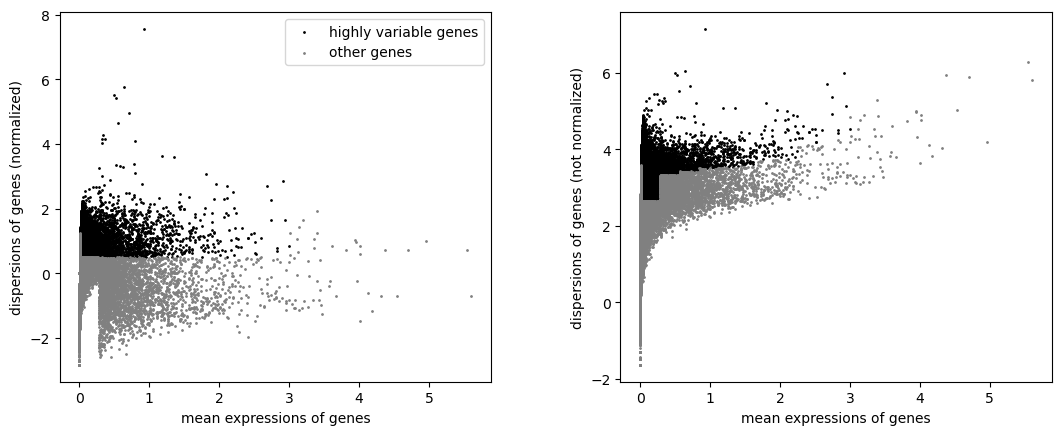

In [309]:
sc.pl.highly_variable_genes(adata)

In [310]:
adata.raw = adata

In [311]:
adata

AnnData object with n_obs × n_vars = 2951 × 22447
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'mito_frac', 'RBP_frac', 'batch', 'donor_id', 'treatment', 'procedure', 'author_cell_type', 'cell_type_cluster', 'clusters', 'PLCG2+ Tumor Subclone', 'Mo/Mφ_metacluster', 'IPF_a1', 'IPF_a2', 'IPF_a3', 'IPF_associated', 'IPF_Monocytic', 'IPF_Fibrotic', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'is_primary_data', 'development_stage_ontology_term_id', 'suspension_type', 'HTAN_Biospecimen_ID', 'HTAN_Participant_ID', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'gene_ids', 'feature_reference', 'feature_biotype', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [312]:
adata = adata[:, adata.var.highly_variable]

/Users/jchaffer/opt/anaconda3/envs/cxg/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [313]:
#sc.pp.regress_out(adata, ['ngenes', 'mito_frac'])

In [314]:
sc.pp.scale(adata, max_value=10)

/Users/jchaffer/opt/anaconda3/envs/cxg/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [315]:
sc.tl.pca(adata, svd_solver='arpack')

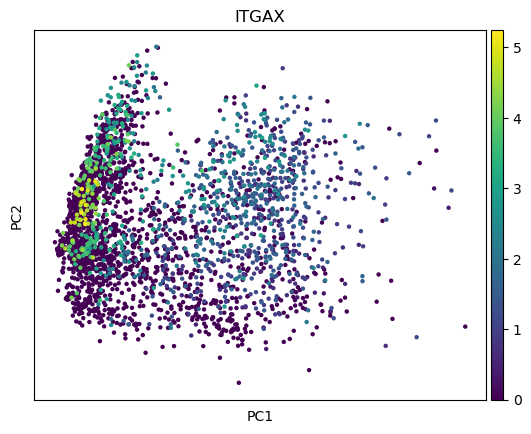

In [316]:
sc.pl.pca(adata, color='ITGAX')

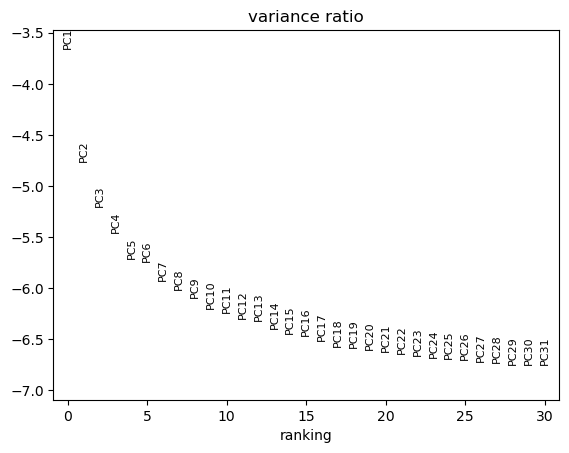

In [317]:
sc.pl.pca_variance_ratio(adata, log=True)

In [318]:
#Neighborhood graph

In [319]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)

In [320]:
sc.tl.umap(adata)

In [321]:
#Clustering the neighborhood graph

In [322]:
sc.tl.leiden(adata)

In [323]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [381]:
# pDC marker_genes = ['CLEC4C','NRP1','IL3RA','LILRA4','TLR7','TLR9']
# cDC marker_genes = ['CD1C','CD8A','ITGAM','ITGAX','ITGAE','LY75','HLA-DRB1','HLA-DRA','HLA-DRB5','CD40','CD80','CD83','CCR7']
# Monocyte marker_genes = ['G0S2','GNLY','ASAH1','LIPA','CXCR1','IL2RB','FGFBP2','CXCR2','PRF1','S100A8','GZMA','CD14','S100A9','NAMPT','CSF3R','FCN1','TSPAN14','ITGAM','LAIR2','CTSW','VCAN','APOBEC3A']
# pMN marker_genes = ['ITGAX','ANPEP','FUT4','CSF3R','FCGR3A','CD33','SELL','CD63','CEACAM1','CEACAM3','CEACAM6','CEACAM8','CD68','THBD','MPO','LYZ','CD24','TLR1','TLR4','CD69','S100A8','S100A9','ADGRG3','IL1R2','MXD1']

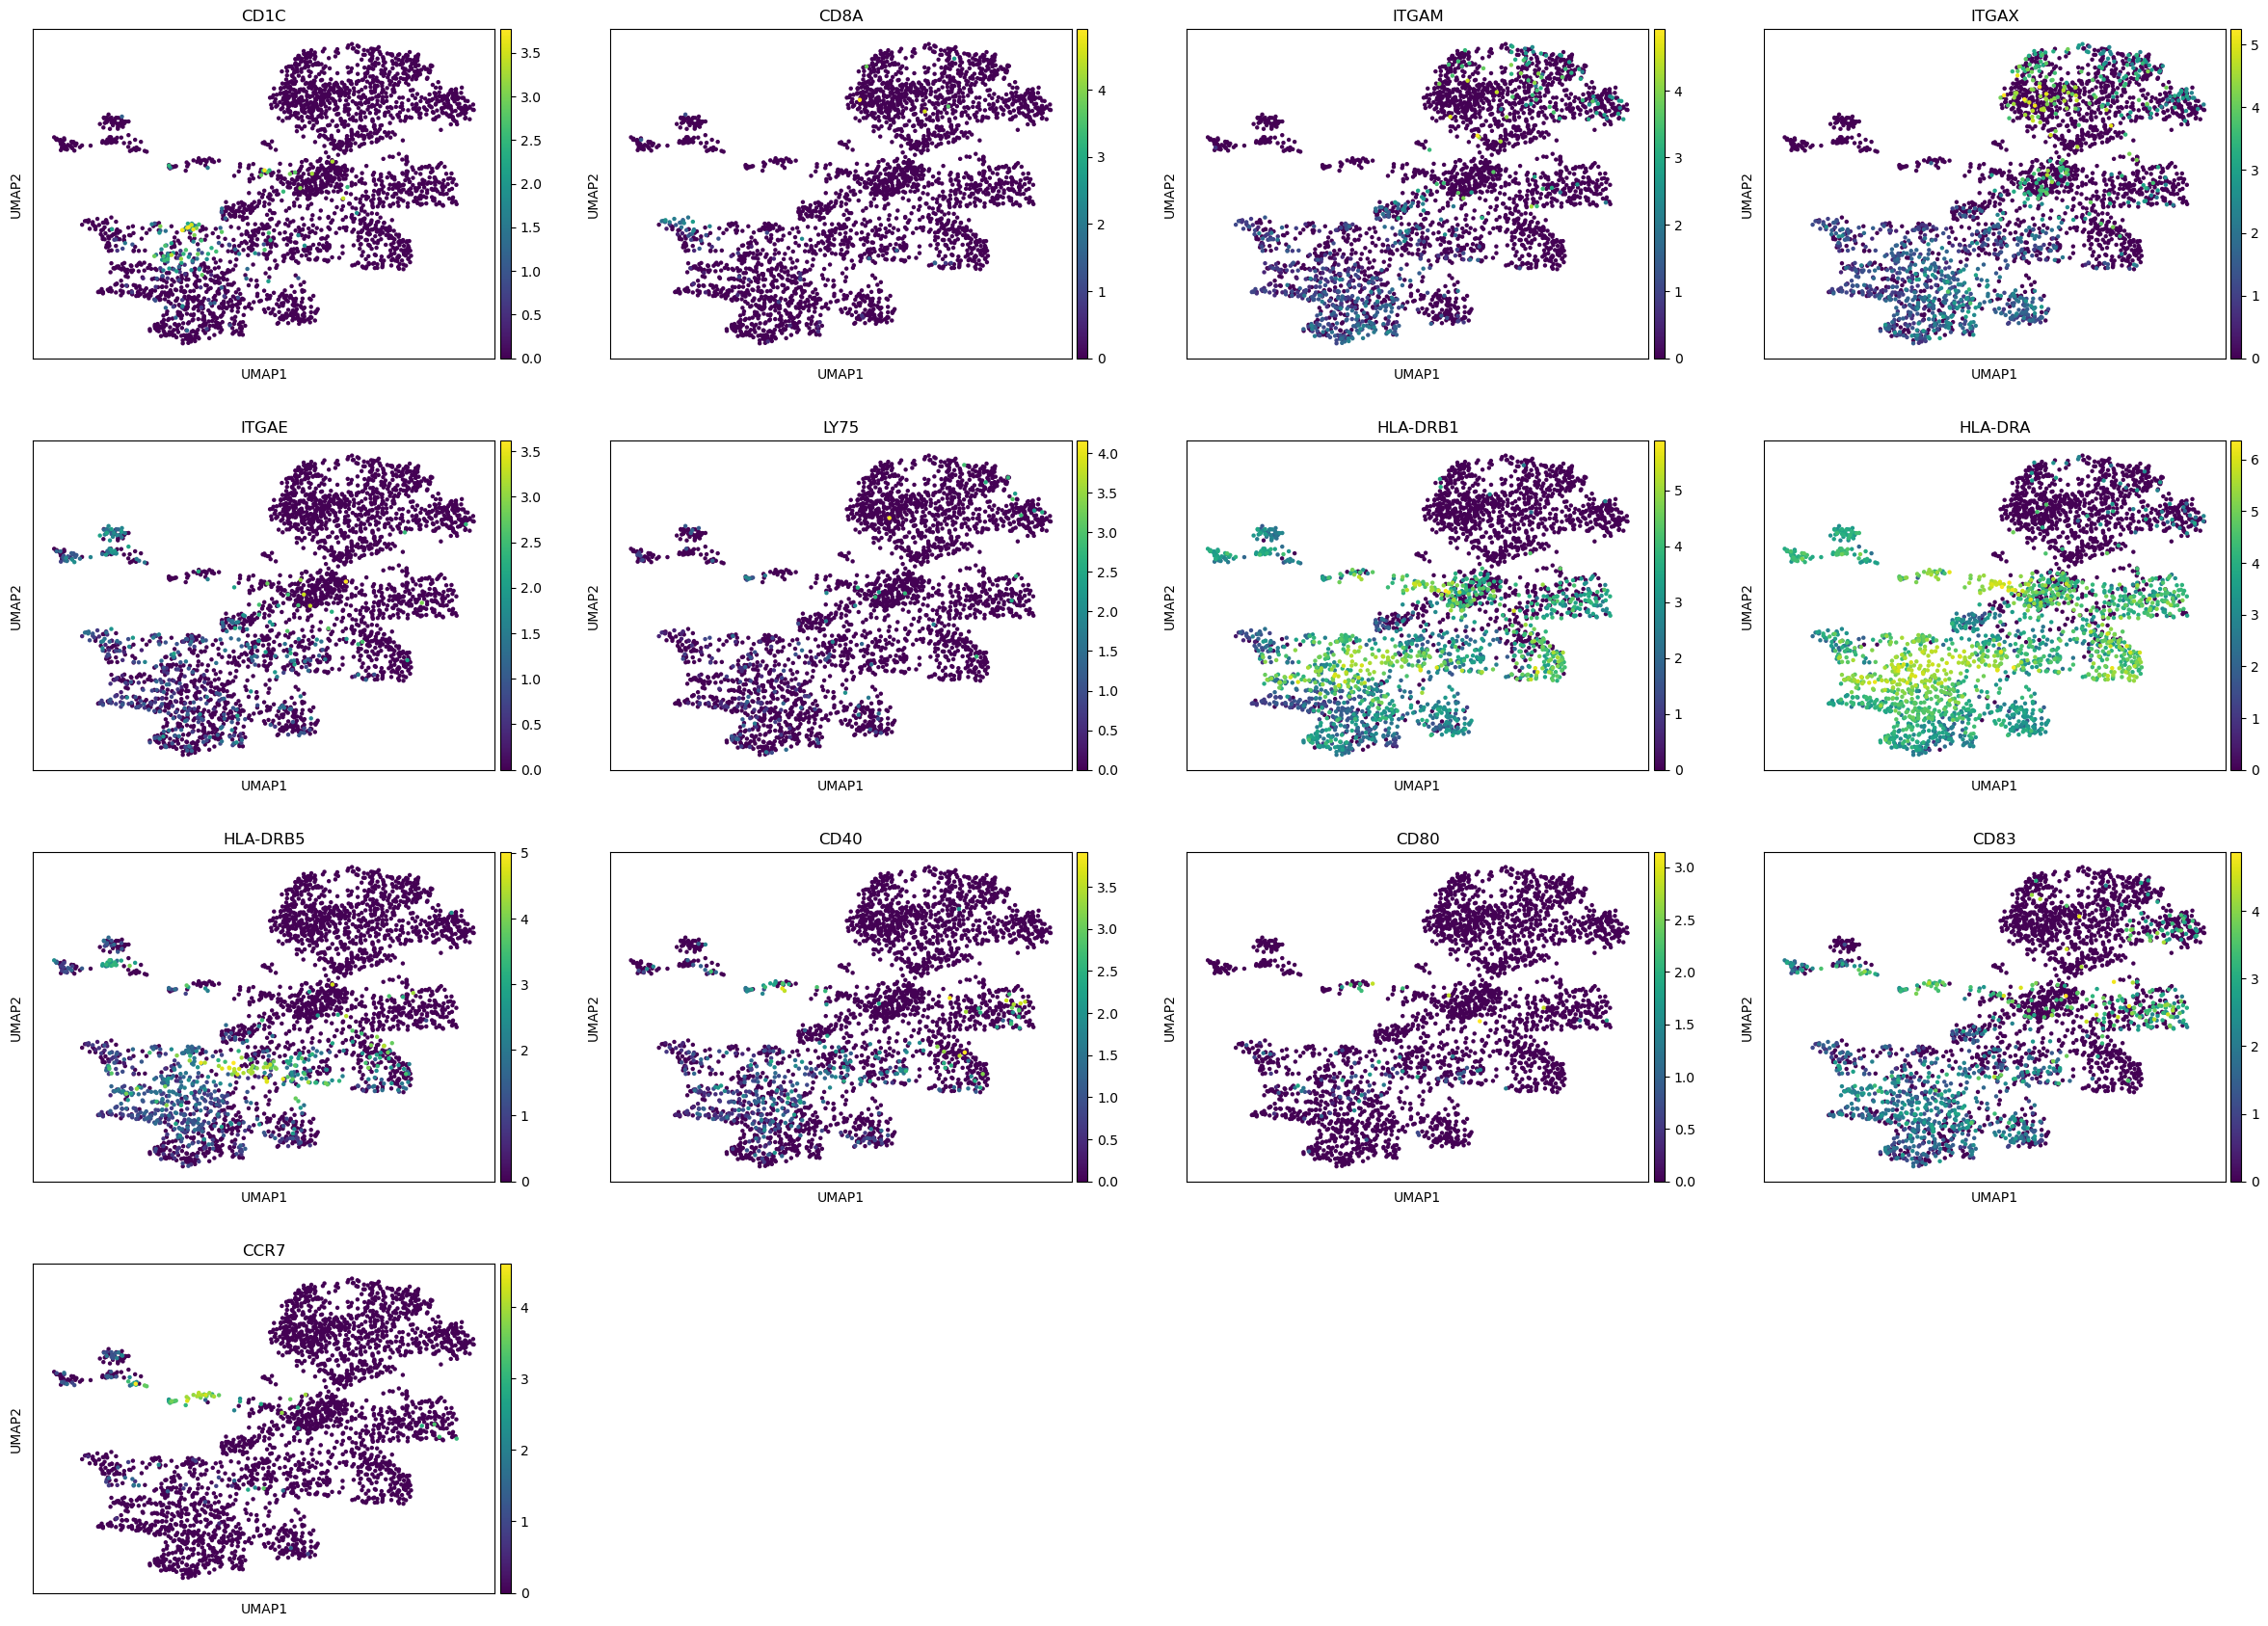

In [382]:
sc.pl.umap(adata, color=marker_genes, legend_loc='on data', frameon=True)

/Users/jchaffer/opt/anaconda3/envs/cxg/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


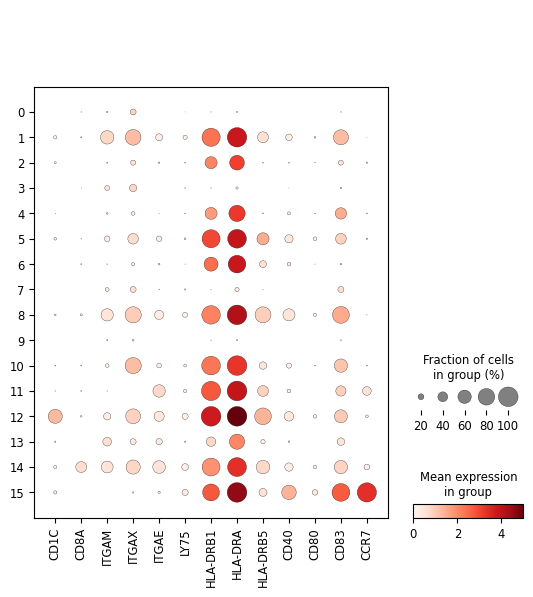

In [383]:
sc.pl.dotplot(adata, marker_genes, groupby='leiden')

In [384]:
# Cluster assignments:
#pDC: 11
#cDC: 2,4,5,6,8,15,12
#Monocyte: 1,9,10,13,14
#pMN: 0,7,3

In [328]:
adata.obs['new_cluster_names'] = adata.obs['leiden']

In [329]:
adata.obs['new_cluster_names'] = adata.obs['new_cluster_names'].cat.add_categories(['pMN'])
adata.obs.loc[adata.obs['new_cluster_names'].isin(['0','7','3']),'new_cluster_names'] = 'pMN'

In [330]:
adata.obs['new_cluster_names'] = adata.obs['new_cluster_names'].cat.add_categories(['pDC'])
adata.obs.loc[adata.obs['new_cluster_names'].isin(['11']),'new_cluster_names'] = 'pDC'

In [331]:
adata.obs['new_cluster_names'] = adata.obs['new_cluster_names'].cat.add_categories(['Monocyte'])
adata.obs.loc[adata.obs['new_cluster_names'].isin(['1','9','10','13','14']),'new_cluster_names'] = 'Monocyte'

In [332]:
adata.obs['new_cluster_names'] = adata.obs['new_cluster_names'].cat.add_categories(['cDC'])
adata.obs.loc[adata.obs['new_cluster_names'].isin(['2','4','5','6','8','15','12']),'new_cluster_names'] = 'cDC'

/Users/jchaffer/opt/anaconda3/envs/cxg/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


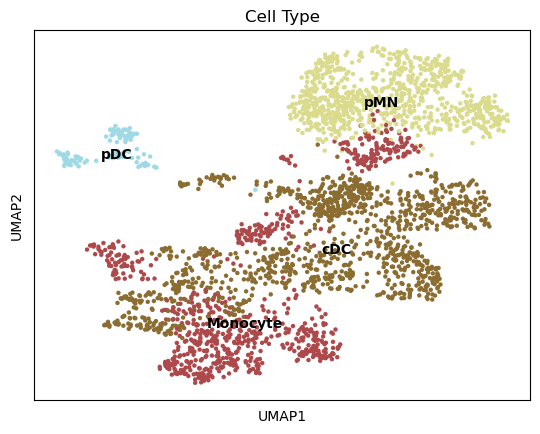

In [361]:
sc.pl.umap(adata, color='new_cluster_names', legend_loc='on data', title='Cell Type', frameon=True, save='.pdf')

In [ ]:
# Measuring Cell type persistency

In [377]:
adata.obs['cell_type'].value_counts()

classical monocyte             1657
neutrophil                     1023
conventional dendritic cell     155
plasmacytoid dendritic cell     116
Name: cell_type, dtype: int64

In [378]:
adata.obs['new_cluster_names'].value_counts()

cDC         1205
pMN          848
Monocyte     783
pDC          115
1              0
15             0
14             0
13             0
12             0
11             0
0              0
9              0
8              0
7              0
6              0
5              0
4              0
3              0
2              0
10             0
Name: new_cluster_names, dtype: int64